# **Practica 3:** N-point Statistics in Fourier Space

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [1]:
#Paqueterias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

## 1 Training on FFT in 1D

1. Let's start playing with FFT to understand the way it works on python. First, just to check we understand, let's work in 1-d. Generate de function of equation 1 for x between 0 and 7 and plot it.

\begin{align}

f(x) &= 1, \hspace{0.5 cm} 3 < x < 4\\
f(x) &= 0, \hspace{0.5 cm} x > 4 \hspace{0.25 cm} \text{or} \hspace{0.25 cm} x < 3

\end{align}

In [2]:
# Función en el espacio real
def func(x):
    if 3 < x < 4:
        return 1
    else:
        return 0
func = np.vectorize(func)
# Array de valores de x
x_arr = np.arange(0,7,0.01)

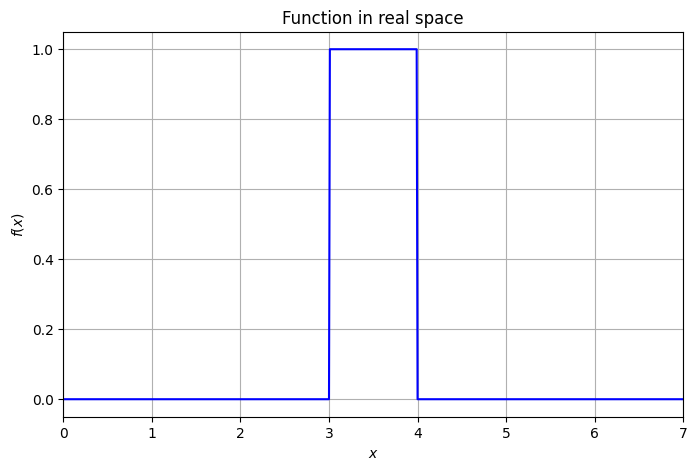

In [3]:
# Graficas de f(x)
plt.figure(figsize=(8, 5))
plt.plot(x_arr, func(x_arr), color='blue')
plt.xlim(0,7)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Function in real space')
plt.grid(True)
plt.show()

2. Apply FFT (np.fft.fft) on this and plot it (real part) verify it gives the equation 2. In order to get the array of values "k" you have to use the function np.fft.fftfreq(). If your array in x space is xarr, you get the k array karr as: np.fft.fftfreq(arrx.shape[-1])

\begin{equation}

\hat{f}(k) \propto \frac{\sin (k\pi)}{k\pi}

\end{equation}

In [4]:
# Transformada de f(x)
func_k_arr = np.fft.fft(func(x_arr)) # f(x) -> f(k)
# Frecuencias k correspondientes al array de x
k_arr = np.fft.fftfreq(x_arr.shape[0], 0.01) #x -> k
# Funcioin f(k) teórica
def func_k(k):
    return 100*np.sin(k*np.pi)/(k*np.pi)
func_k = np.vectorize(func_k)

C:\Users\hugor\AppData\Local\Temp\ipykernel_21936\1486343269.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return 100*np.sin(k*np.pi)/(k*np.pi)


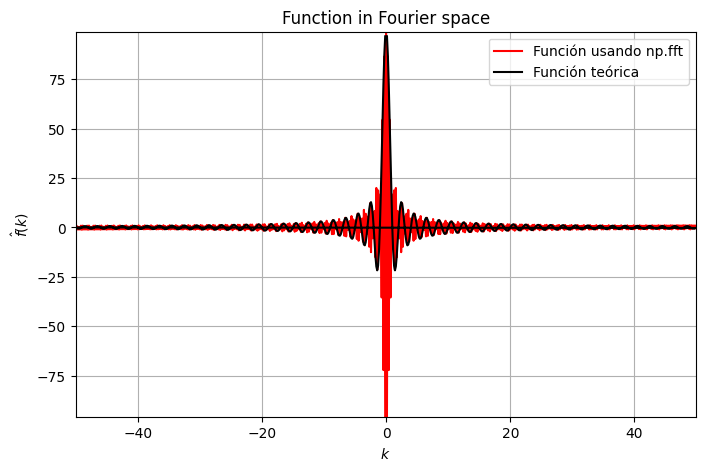

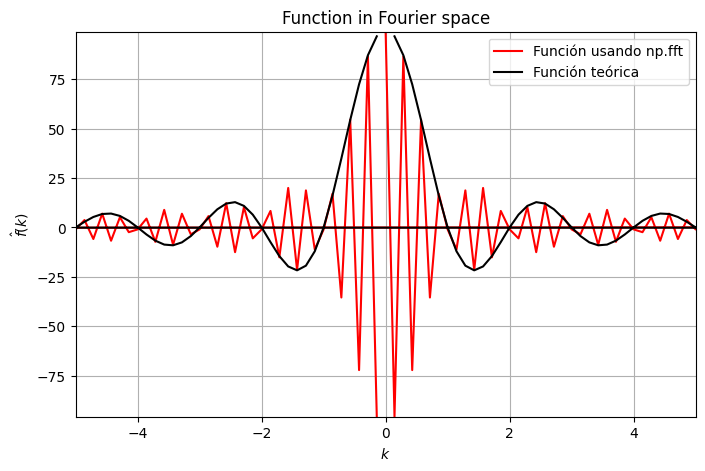

In [5]:
# Graficas de f(k)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(min(k_arr), max(k_arr))
ax.set_ylim(min(func_k_arr.real), max(func_k_arr.real))
ax.plot(k_arr, func_k_arr.real, color='red', label='Función usando np.fft')
ax.plot(k_arr, func_k(k_arr), color='black', label='Función teórica')
ax.legend(prop={'size': 10})
ax.set_xlabel('$k$')
ax.set_ylabel('$\\hat{f}(k)$')
ax.set_title("Function in Fourier space")
ax.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-5, 5)
ax.set_ylim(min(func_k_arr.real), max(func_k_arr.real))
ax.plot(k_arr, func_k_arr.real, color='red', label='Función usando np.fft')
ax.plot(k_arr, func_k(k_arr), color='black', label='Función teórica')
ax.legend(prop={'size': 10})
ax.set_xlabel('$k$')
ax.set_ylabel('$\\hat{f}(k)$')
ax.set_title("Function in Fourier space")
ax.grid(True)
plt.show()

3. Finally apply IFFT (np.fft.ifft) and verify you recover the original function.

In [6]:
# Transformada inversa de f(k)
func_x_arr = np.fft.ifft(func_k_arr) # f(k) -> f(x)

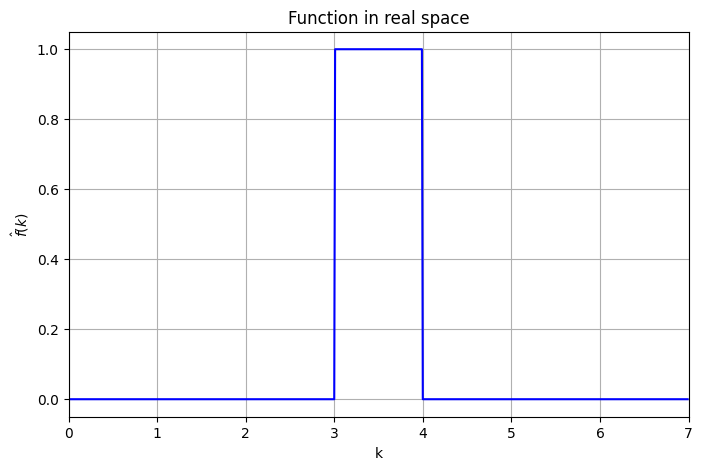

In [7]:
# Graficas de f(x)
plt.figure(figsize=(8, 5))
plt.plot(x_arr, func_x_arr.real, color='blue')
plt.xlim(0,7)
plt.xlabel('k')
plt.ylabel('$\\hat{f}(k)$')
plt.title('Function in real space')
plt.grid(True)
plt.show()

## 2 Playing with FFT in 2D

1. Look for and image in black and white, plot it with imshow() (or similar).

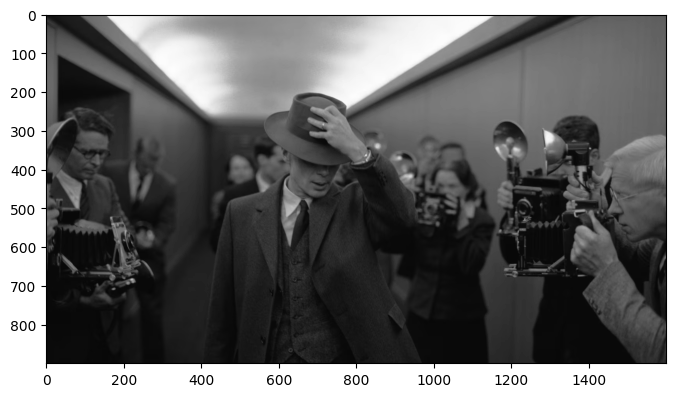

In [8]:
# Cargar imagen
oppi = img.imread("C:\\Users\\hugor\\OneDrive\\Escritorio\\2\\cosmo\\im1.png")
oppi = oppi[:,:,1]

# Plotear imagen
plt.figure(figsize=(8, 5))
plt.imshow(oppi, cmap='gray')

2. Compute the FFT of the image and plot it.

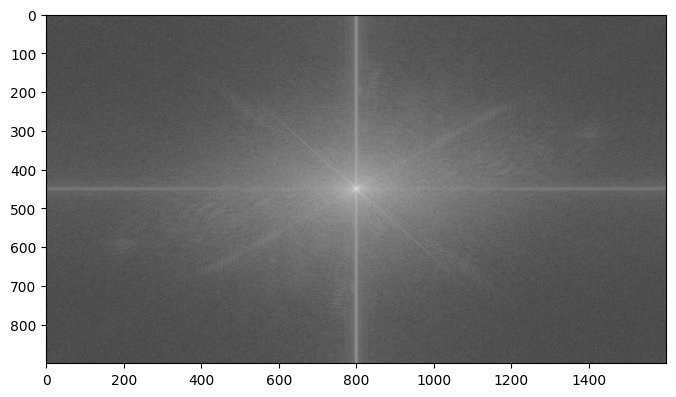

In [9]:
# Se aplica la TF 2D a la imagen y se ordenan los k usando shift
oppi_f=np.fft.fftshift(np.fft.fft2(oppi))

plt.figure(figsize=(8, 5))
plt.imshow(np.log(abs(oppi_f)), cmap='gray')

3. Eliminate modes with $k > k_0$, similar to slides showed in the lecture. Inverse transformed back and plot it.

In [10]:
# Valor de k0
k0 = 50 

# Se definen las dimensiones de la "máscara" para aplicarla a la imagen
rows, cols = oppi_f.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask1 = np.ones((rows, cols), np.uint8) # Llena un array con la dimensión que se le da de puros 1

# Se definen el tamaño del radio y el centro
r = k0
center = [crow, ccol]

# Se define la malla de valores por los que se multiplicará a la imagen
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2

# Se eliminan los modos k en esta area
mask1[mask_area] = 0.0 

C:\Users\hugor\AppData\Local\Temp\ipykernel_21936\2933985006.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(oppi_f1)), cmap='gray')


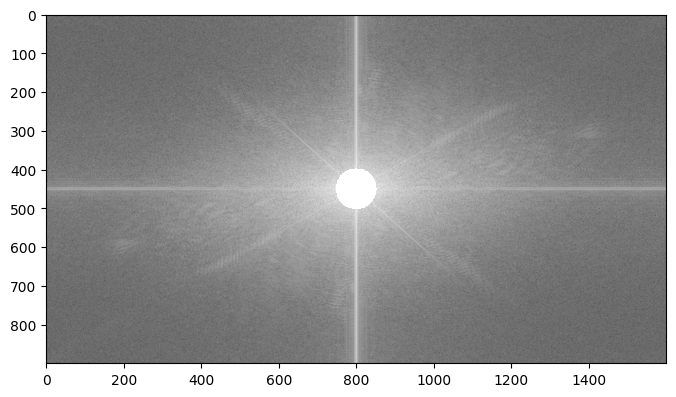

In [11]:
# Aplicar la máscara significa multiplicar el arreglo mask por la transformada de la imagen
oppi_f1 = oppi_f*mask1

plt.figure(figsize=(8, 5))
plt.imshow(np.log(abs(oppi_f1)), cmap='gray')

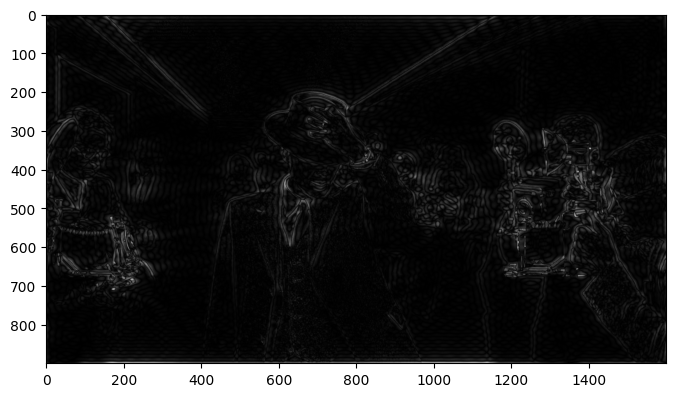

In [12]:
# Se invierte el shift
oppi_1 = np.fft.ifft2(np.fft.ifftshift(oppi_f1))

plt.figure(figsize=(8, 5))
plt.imshow(abs(oppi_1), cmap='gray')

4. Eliminate modes with $k < k_0$ similar to slides showed in the lecture. Inverse transformed back and plot it.

In [13]:
mask2 = np.zeros((rows, cols), np.uint8)

# Se eliminan los modos k fuera del area
mask2[mask_area] = 1.0

C:\Users\hugor\AppData\Local\Temp\ipykernel_21936\2273665357.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(oppi_f2)), cmap='gray')


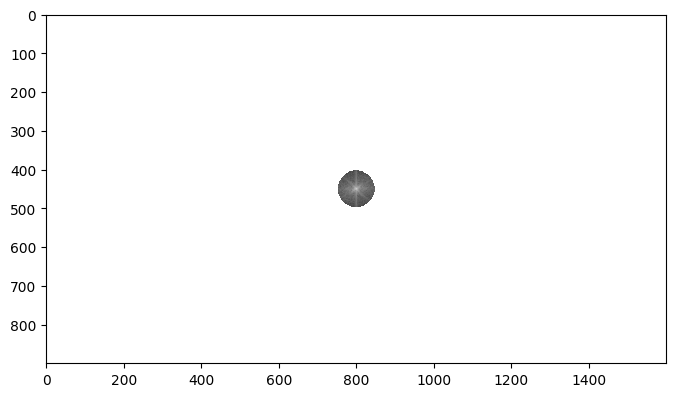

In [14]:
oppi_f2 = oppi_f*mask2

plt.figure(figsize=(8, 5))
plt.imshow(np.log(abs(oppi_f2)), cmap='gray')

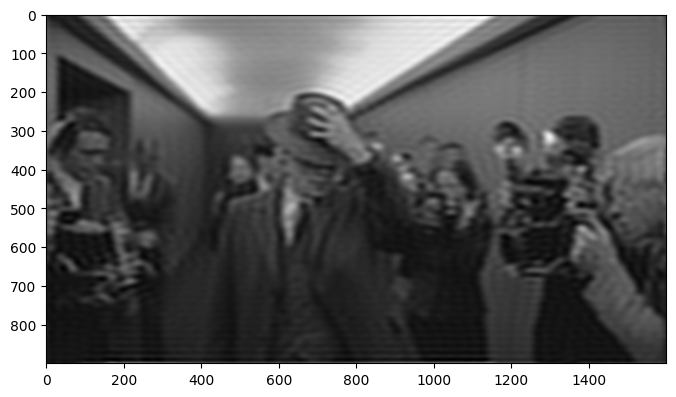

In [15]:
oppi_2 = np.fft.ifft2(np.fft.ifftshift(oppi_f2))

plt.figure(figsize=(8, 5))
plt.imshow(abs(oppi_2), cmap='gray')

## 3 Power Spectrum

We are going now to practice 2P-statistics in Fourier Space.

1. We will use the file `HalolistNOFOFR1000.txt' the format is $x, y ,z$, mass. We will use a gridsize = 10. for estimating the density using the NGP particle distribution scheme. Determine the min and max of the coordinates to determine the size of the box, you will need those quantities for the density estimation.

In [16]:
# Cargar la data
data=np.loadtxt('C:\\Users\\hugor\\OneDrive\\Escritorio\\2\\cosmo\\Halo_list_NO_FOFR_1000.txt')
data = data/10
x_arr = data[:,0]
y_arr = data[:,1]
z_arr = data[:,2]
# Caracteristicas del grid
L = 100
N_grid = L + 1
vol_box = L**3
vol_pix = 1
num_galax_tot = data.shape[0]

2. Plot a slide of the density, you can use imshow() or meshgrid(), take a look to the doc.

In [17]:
# Se van a desplazar los valores de x,y,z para que los centros de los bines coincidan con los pts del grid
data_center_bin = data[:,:3]-0.5 # Data en coords tal que los centros de los bines sean pts
data_bin = np.array([np.zeros(data.shape[0]), np.zeros(data.shape[0]), np.zeros(data.shape[0])])
# Dado que se recorre 0.5 pts los array, aquellos valores negativos van a estar del lado izquierdo del primer bin, por lo cual se redondea a cero
for i in range(data.shape[0]):
    data_bin[0,i] = max(data_center_bin[i,0],0)
for i in range(data.shape[0]):
    data_bin[1,i] = max(data_center_bin[i,1],0)
for i in range(data.shape[0]):
    data_bin[2,i] = max(data_center_bin[i,2],0)
    
# Definimos el array donde pondremos los puntos
num_galax_pix = np.zeros((L,L,L))
# Luego hacemos el loop para asignar los puntos según sus corrdenadas
for r in range(data.shape[0]):
    i,j,k=np.round(data_bin[0,r]),np.round(data_bin[1,r]),np.round(data_bin[2,r])
    num_galax_pix[int(i),int(j),int(k)]+=1

# Se calcula la densidad y el contraste de densidad (delta)
density = num_galax_pix/vol_pix
density_med = num_galax_tot/vol_box
delta = density/density_med - 1

Text(0.5, 1.0, 'Density contrast in real space (with $z = 0$)')

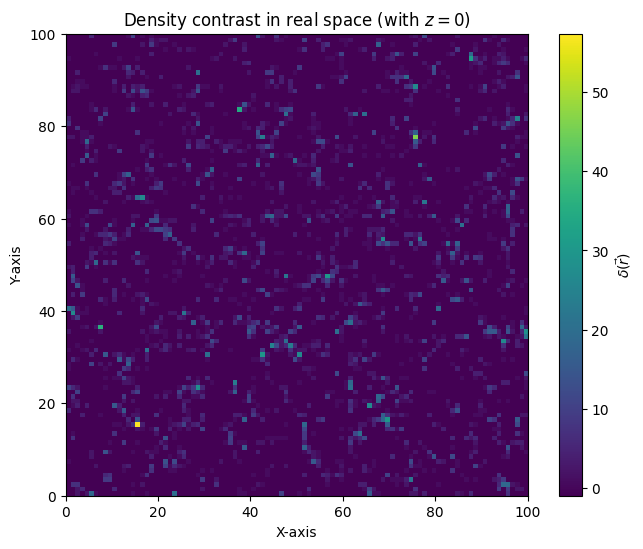

In [18]:
# Graficamos una de las capas de la malla
plt.figure(figsize=(8, 6))
plt.imshow(delta[:,:,0], cmap='viridis', origin='lower', vmin=-1, extent=(0, L, 0, L))
plt.colorbar(label='$\\delta(\\vec{r})$')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Density contrast in real space (with $z = 0$)')

3. Use the FFT in n dimensions for performing the Fourier Transform. Plot the real and imaginary part of the density in FS.

In [19]:
# Se aplica la TF al contraste de densidad
delta_fourier = np.fft.fftshift(np.fft.fftn(delta))
# delta_fourier = np.fft.fftn(delta)
density_fourier = np.fft.fftn(density)

# Se separan la parte real e imaginaria
delta_fourier_real = delta_fourier.real
delta_fourier_im = delta_fourier.imag

# Create frequency vectors for the x, y and z axes
k_x = np.fft.fftshift(np.fft.fftfreq(L))
k_y = np.fft.fftshift(np.fft.fftfreq(L))
k_z = np.fft.fftshift(np.fft.fftfreq(L))
# k_x = np.fft.fftfreq(L)
# k_y = np.fft.fftfreq(L)
# k_z = np.fft.fftfreq(L)

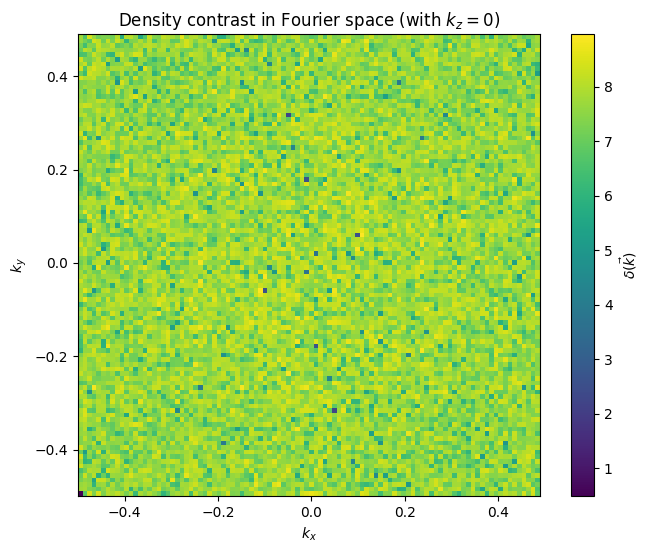

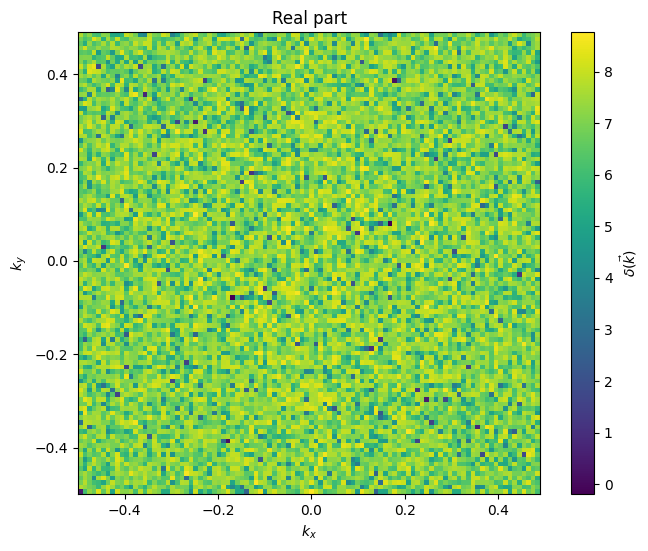

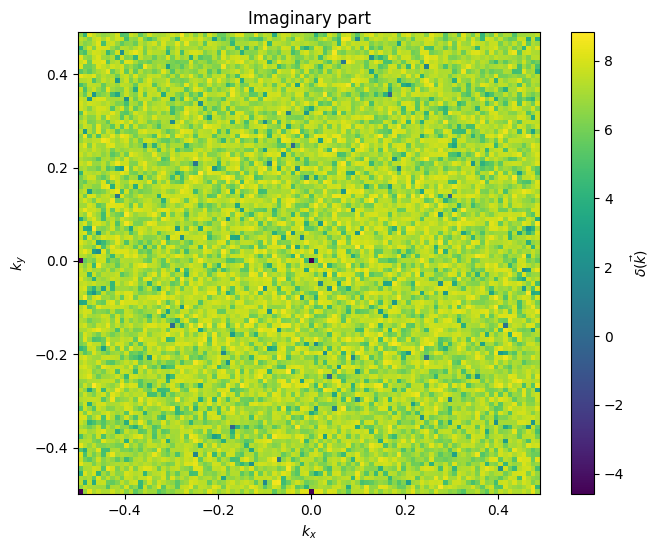

In [20]:
plt.figure(figsize=(8, 6))
# plt.imshow(np.log(abs(delta_fourier[:,:,0])), cmap='viridis', extent=(min(k_x), max(k_x), min(k_y), max(k_y)))
plt.imshow(np.log(abs(delta_fourier[:,:,0])+0.01), cmap='viridis', origin='lower', extent=(min(k_x), max(k_x), min(k_y), max(k_y)))
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Density contrast in Fourier space (with $k_z = 0$)')
plt.colorbar(label='$\\delta(\\vec{k})$')
plt.show()

plt.figure(figsize=(8, 6))
# plt.imshow(np.log(abs(delta_fourier_real[:,:,0])), cmap='viridis', extent=(min(k_x), max(k_x), min(k_y), max(k_y)))
plt.imshow(np.log(abs(delta_fourier_real[:,:,0])+0.01), cmap='viridis', origin='lower', extent=(min(k_x), max(k_x), min(k_y), max(k_y)))
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Real part')
plt.colorbar(label='$\\delta(\\vec{k})$')
plt.show()

plt.figure(figsize=(8, 6))
# plt.imshow(np.log(abs(delta_fourier_im[:,:,0])), cmap='viridis', extent=(min(k_x), max(k_x), min(k_y), max(k_y)))
plt.imshow(np.log(abs(delta_fourier_im[:,:,0])+0.01), cmap='viridis', origin='lower', extent=(min(k_x), max(k_x), min(k_y), max(k_y)))
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.title('Imaginary part')
plt.colorbar(label='$\\delta(\\vec{k})$')
plt.show()

4. Determine kmin and max, you will required later on...

In [21]:
k_max = (2*(N_grid-1)*np.pi)/(2*(10*L))
k_min = 2*np.pi/(10*L)
n_k = L
k_arr = np.sqrt(k_x**2 + k_y**2 + k_z**2)
k_arr_pk = np.linspace(min(k_arr), max(k_arr), n_k)
dk = (max(k_arr)-min(k_arr))/(n_k-1)

5. Estimate the power spectrum, (Hint: remember the definition in terms of the variance).

6. When computing the average par $[k]$, the tricky step is to think the k range.

7. Take care of the normalization factors that depends on the FFTW convention, check the doc of the numpy functions used.

In [22]:
pre_var = np.zeros(len(k_arr_pk))
n_count = np.zeros(len(k_arr_pk))
# For every value in k, we're gonna take the variance of delta(k)
for i in range(len(k_x)):    # Running for every x value in k  
    for j in range(len(k_y)):    # Running for every x value in k in y
        for m in range(len(k_z)): 
            k = ((k_x[i])**2 + (k_y[j])**2 + (k_z[m])**2)**0.5
            index = np.where( (k_arr_pk + dk/2 > k) & (k_arr_pk - dk/2 < k) )   # It tells us which index satisty the prev. condition
            pre_var[index[0]] += np.abs(delta_fourier[i][j][m])**2  # Associates the density value of certain x,y,z point
            n_count[index[0]] += 1  
# The variance is computed just as the sum of pre_var over the number of elements it took
variance_arr = np.zeros(len(pre_var))
for nn in range(len(pre_var)):
    variance_arr[nn] = pre_var[nn]/n_count[nn]
# Computing el power spectrum
Pk_arr = (1/(2*np.pi)**(3))*variance_arr
# Normalización del power spectrum
norm_factor = ((10*L)**3)/(N_grid-1)**6
Pk_normalized = norm_factor*Pk_arr

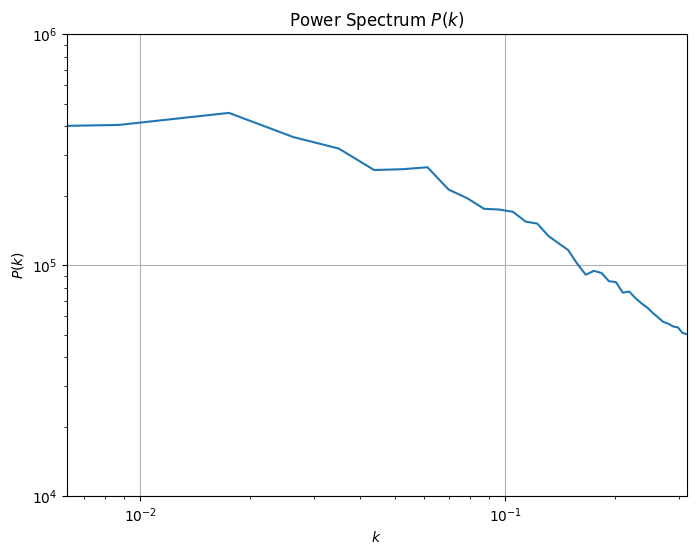

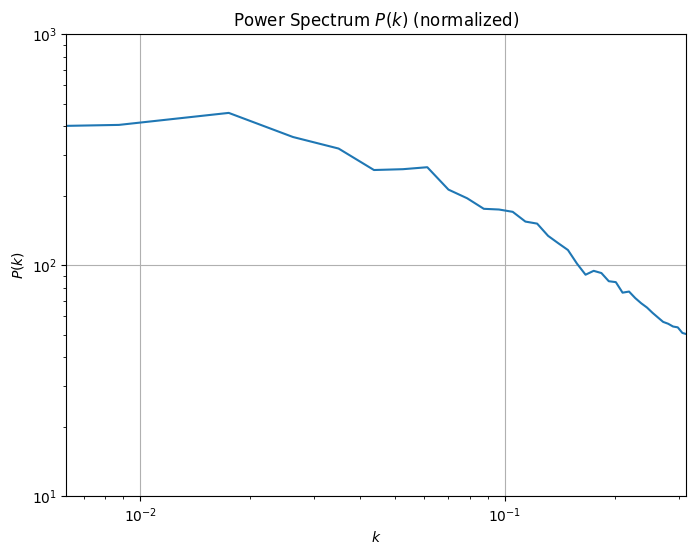

In [23]:
# Power spectrum
# Sin normalizar
plt.figure(figsize=(8, 6))
plt.loglog(k_arr_pk,Pk_arr)
plt.title('Power Spectrum $P(k)$')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.xlim(k_min, k_max)
plt.ylim(1e4, 1e6)
plt.grid(True)
plt.show()
# Normalizado
plt.figure(figsize=(8, 6))
plt.loglog(k_arr_pk,Pk_normalized)
plt.title('Power Spectrum $P(k)$ (normalized)')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.xlim(k_min, k_max)
plt.ylim(1e1, 1e3)
plt.grid(True)
plt.show()